# Predicting Bike Rentals

Many U.S. cities have communal bike sharing stations where you can rent bicycles by the hour or day. Washington, D.C. is one of these cities. The District collects detailed data on the number of bicycles people rent by the hour and day.

[Hadi Fanaee-T](http://www.liaad.up.pt/area/fanaee) at the University of Porto compiled this data into a CSV file,which we will be using in this project.The file contains 17380 rows, with each row representing the number of bike rentals for a single hour of a single day. The data can be downloaded from the [University of California, Irvine's website](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset)

The objective of this project is to compute the total number of bikes rented in a given hour.


In [1]:
# Load the data

import pandas as pd
import numpy as np

data=pd.read_csv("bike_rental_hour.csv")

In [2]:
data.head(20)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


Below is the description of the relevant columns:

| Column      	| Description                                                                                           	|
|-------------	|-------------------------------------------------------------------------------------------------------	|
| instant     	|  A unique sequential ID number for   each row                                                         	|
| dteday      	|  The date of the rentals                                                                              	|
| season      	|  The season in which the rentals   occurred                                                           	|
| yr          	|  The year the rentals occurred                                                                        	|
| mnth        	|  The month the rentals occurred                                                                       	|
| hr          	|  The hour the rentals occurred                                                                        	|
| holiday     	|  Whether or not the day was a   holiday                                                               	|
| weekday     	|  The day of the week (as a   number, 0 to 7)                                                          	|
| workingday  	|  Whether or not the day was a   working day                                                           	|
| weathersit  	|  The weather (as a categorical   variable)                                                            	|
| temp        	|  The temperature, on a 0                                                                              	|
| atemp       	|  The adjusted temperature                                                                             	|
| hum         	|  The humidity, on a 0                                                                                 	|
| windspeed   	|  The wind speed, on a 0                                                                               	|
| casual      	|  The number of casual riders   (people who hadn't previously signed up with the bike sharing program) 	|
| registered  	|  The number of registered riders   (people who had already signed up)                                 	|
| cnt         	|  The total number of bike rentals   (casual + registered)                                             	|

In [3]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [4]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [5]:
# Convert the type of dteday column
data["dteday"]=pd.to_datetime(data["dteday"])

# Exploratory Analysis

Before we build the model we will be analyzing the data first and try to understand the patterns if there are any.

In [6]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

From the above we can say there are no missing values in the data.

<AxesSubplot:>

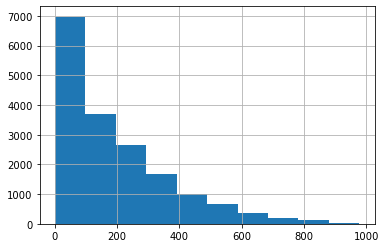

In [7]:
# Explore the distribution of the rentals count
data["cnt"].hist()

From the above graph we can say that the distribution of rentals is skewed and most of the bike rentals per day per hour are in the range of 0 - 100

In [8]:
# Corrlation of the other variables with bike rentals.

data.corr()["cnt"].abs().sort_values(ascending=False)

cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
hum           0.322911
instant       0.278379
yr            0.250495
season        0.178056
weathersit    0.142426
mnth          0.120638
windspeed     0.093234
holiday       0.030927
workingday    0.030284
weekday       0.026900
Name: cnt, dtype: float64

From the above we can see that the highest correlation of the bike rentals is with whether the user is registerd or not followed by casual rider. Also temperature and humidity seem to have some impact on bike rentals.

# Creating New Features

Befor we actually dive into modelling the data we can try to create some additional features out of the existing features or try to modify the features we have.

We have the hour column in our data. But instead of treating every hour differently we can convert the column into time of the day like morning,afternoon,evening and night.Instead of assigning them the text labels we will assingn then numeric labels like 1,2,3 & 4


In [9]:
# Create a function to map time of the day

def assign_label(row):
    if 6 <= row <12:
        return 1
    elif 12 <=row <18:
        return 2
    elif 18<=row<24:
        return 3
    elif 0<=row<6:
        return 4
    else:
        return np.nan

# Use the above funtion to assign labels

data["time_label"]=data["hr"].apply(assign_label)

# Building the Model

Before we actually start modelling the data we will need to divide the data into train and test.We will be building our model on the train data and then test the accuracy of the model on the test data. For accuracy testing we will be using the Root Mean Squared Error metric since that fits well to continuous data and our target variable which is **cnt** is fairly continuous.

## Dividing the data into train and test data

In [10]:
from sklearn.model_selection import train_test_split
features=data.columns.drop(["instant","dteday","hr","casual","registered","cnt"])
'''
We are not selecting instant because they are just identifiers,dteday is date when the instant occured 
and we already have year and month derived.
We have a column called time_labels derived from hr hence we will be ignoring this column as well.
Cnt which is our target variable is nothing but the sum of cadsual and registered columns. 
Hence we will not be using these columns as well because that will lead to multicollinearity.
Cnt is dropped because that is our target variable
'''

features

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'time_label'],
      dtype='object')

In [11]:
X=data[features]  # all independent variables or features
Y=data["cnt"]     # target variable
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,random_state=8)

Linear regression requires all features to be numeric.We mostly have all the selected features above as numeric so there is no conversion required.

In [12]:
# Scaling the features
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.fit_transform(X_test)

## Linear Regression Model

In [13]:
#Training the model
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr_model=lr.fit(X_train_scaled,Y_train)
print(f" The R_squared value of linear regression model is {lr_model.score(X_train_scaled,Y_train)}")

 The R_squared value of linear regression model is 0.4117033490862887


In [14]:
predictions_lr_model=lr_model.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error
rmse_lr=np.sqrt(mean_squared_error(Y_test,predictions_lr_model))
print(f" The RMSE value of Linear Regression Model is {rmse_lr}")

 The RMSE value of Linear Regression Model is 139.59432295653158


In [15]:
#Plot actual vs predicted line to gauge model performance compared to perfect fit
import matplotlib.pyplot as plt
def plot_real_vs_predicted(y_test, y_pred):
    """
    :param y_test: Ground truth (correct) target values.
    :param y_pred: Estimated target values.
    :return: Plot
    """
    plt.plot(y_test, y_pred, 'ro')
    
    plt.plot(y_test, y_test, 'g-')
    
    plt.xlabel('actual')
    
    plt.ylabel('pred')
    
    plt.show()
    
    return plt

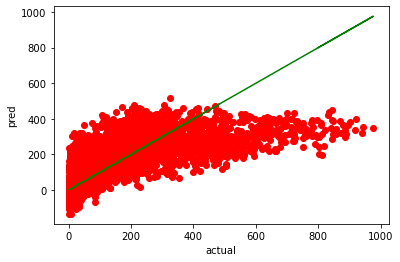

In [16]:
plot_real_vs_predicted(Y_test,predictions_lr_model)
plt.show()

### Conclusion for Linear Regression

From the above we can see that:
1. The R squared value for the linear regression model is 0.411 which suggests that our model is not performing well.
2. From the above graph as well we can see that there is a significant difference in the actual and predicted values.
3. The RMSE value is 139.54.We need to explore other options and check if there is an improvement in RMSE.

## Decision Tree model

In [17]:
# Training the model

from sklearn.tree import DecisionTreeRegressor  # DecisionTreeRegressor because we need to predict continuous value
dt=DecisionTreeRegressor()
dt_model=dt.fit(X_train,Y_train) # Decision tree models do not require scaling

In [18]:
# Making predictions
predictions_dt_model=dt_model.predict(X_test) 

rmse_dt=np.sqrt(mean_squared_error(Y_test,predictions_dt_model))
print(f" The RMSE value of Decision Tree Regression Model is {rmse_dt}")

 The RMSE value of Decision Tree Regression Model is 150.36830821888344


From the above we can see that the decision tree models have further increased RMSE value. However we can try hypertuning some parameters in the models and check if that improves the accuracy.
We can use any of the following:

| Column                    	| Description                                                                                                                                                                   	|
|---------------------------	|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------	|
| max_depth                 	|  Globally restricts how deep the   tree goes                                                                                                                                  	|
| min_samples_split         	|  The minimum number of rows a node   should have before it can be split; if this is set to 2. For example,   then nodes with 2 rows won't be split, and become leaves instead 	|
| min_samples_leaf          	|  The minimum number of rows a leaf   must have                                                                                                                                	|
| min_weight_fraction_leaf  	|  The fraction of input rows a leaf   must have                                                                                                                                	|
| max_leaf_nodes            	|  The maximum number of total   leaves; this will cap the count of leaf nodes as the tree is being built                                                                       	|


In [19]:
# Training the model
# Set the min_samples_leaf and min_samples_split
dt=DecisionTreeRegressor(min_samples_leaf=8,min_samples_split=100)
dt_model=dt.fit(X_train,Y_train) # Decision tree models do not require scaling

# Making predictions
predictions_dt_model=dt_model.predict(X_test) 

rmse_dt=np.sqrt(mean_squared_error(Y_test,predictions_dt_model))
print(f" The RMSE value of Decision Tree Regression Model is {rmse_dt}")

 The RMSE value of Decision Tree Regression Model is 116.81771892725563


Decision trees tend to overfit the model.Hence we will be testing the accuracy on train data as well. If the accuracy of train and test has a large difference then we will know that the model is a overfit.

In [20]:
# Making predictions on train data

predictions_dt_model_train=dt_model.predict(X_train) 

rmse_dt=np.sqrt(mean_squared_error(Y_train,predictions_dt_model_train))
print(f" The RMSE value of Decision Tree Regression Model on train data is {rmse_dt}")

 The RMSE value of Decision Tree Regression Model on train data is 108.26417627137855


As we all can see that the RMSE value is not very far off from the test data and hence our model is not a overfit.

### Conclusion for Decision Tree model

From the above we can see that:

1. The decision tree model with the default values was not proving to be a improvement on the Linear Regression model.
2. Post hyperparameter tuning we saw that the model gave better results.The RMSE is 116.82 compared to Linear regression RMSE of 140.
3. We have checked if the decision tree has overfitted. But there are no significant diffferences in accuracies of both train and test data. Hence the model is a good fit.


## Random Forest model

In [32]:
# Training the model
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()  
rf_model=rf.fit(X_train,Y_train)                             

In [33]:
# Making predictions
predictions_rf_model=rf_model.predict(X_test) 

rmse_rf=np.sqrt(mean_squared_error(Y_test,predictions_rf_model))
print(f" The RMSE value of Random Forest Regression Model is {rmse_rf}")

 The RMSE value of Random Forest Regression Model is 112.37724048309


In [34]:
# Making predictions on train data

predictions_rf_model_train=rf_model.predict(X_train) 

rmse_rf=np.sqrt(mean_squared_error(Y_train,predictions_rf_model_train))
print(f" The RMSE value of Random Forest Regression Model on train data is {rmse_dt}")

 The RMSE value of Random Forest Regression Model on train data is 108.26417627137855


### Concluision for random forest model

As we can see above the random forecast model has further increased the accuracy compared to decision trees.From the three models which we tried we can say that the random forest model has given us the best accuracy so far and can be selected as the best model.

# Hyper parameter tuning

As we had seen above the random forest model did has done a good job in predicting the bike rentals.However we can check if the accuracy improves by further hypertuning the parameters. For example we can try running the model at different values  of n_estimators or combinations of min_samples_leaf and n_estimators and so on and check the accuracy.The model with the highest accuracy can be selected as the best model.

In [50]:
# Checking the various paramters in random forest model

RandomForestRegressor().get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Random Search 

Above we have a list of parameters and we can choose any parameter or set of parameters and try different values for those.However theory suggests that the modet important features are n_estimators(number of trees in the forest) and max_features(number of features considered for each split).We will focus on these two and some more parametrs and try the random forest model for these two parameters.

To do this we will be using Random Search from scikit learn library. In this method we will be passing certain values for the paramters and then the the random search will pick up random combinations of those paramters,train the model and give the model with best accuracy.

In [42]:
# Importing random search grid
from sklearn.model_selection import RandomizedSearchCV

# Defining the list of paramter values we want to try

#below we are defining values 100,200....900 for n_estimators
n_estimators=[int(x) for x in range(100,2000,100)]

max_features=['auto','sqrt']

min_samples_leaf=[int(x) for x in range(1,100,10)]


In [46]:
# Create the random grid
# This will involve creating a dictionary of parameters which we want to hypertune

random_grid={"n_estimators":n_estimators,"max_features":max_features,'min_samples_leaf':min_samples_leaf}

In [47]:
# Train the random search

#Calling the base model
rf_rand=RandomForestRegressor()

#Using random search on base model

rf_rs=RandomizedSearchCV(estimator=rf_rand,param_distributions=random_grid,n_iter=100,cv=3,random_state=42)

'''
The n_iter parameter will decide how many combinations we want to try
The cv paramter is the number of folds we want for cross validation
'''

# Fit the model
rf_rs.fit(X_train,Y_train)


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 11, 21, 31, 41,
                                                             51, 61, 71, 81,
                                                             91],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500, 1600,
                                                         1700, 1800, 1900]},
                   random_state=42)

In [48]:
# Review the model with best parameters
rf_rs.best_params_


{'n_estimators': 1900, 'min_samples_leaf': 1, 'max_features': 'sqrt'}

Now we will try fitting the model with above paramters and check the accuracy on the test set.

In [53]:
# Fit the model with revised parameters
rf_rev_params=RandomForestRegressor(max_features='sqrt',n_estimators=1900,min_samples_leaf=1)
rf_rev_params=rf_rev_params.fit(X_train,Y_train)

In [56]:

# Making predictions
predictions_rf_rev_params=rf_rev_params.predict(X_test) 

rmse_rf_rev_params=np.sqrt(mean_squared_error(Y_test,predictions_rf_rev_params))
print(f" The RMSE value of Random Forest Regression Model with revised paramters is {rmse_rf_rev_params}")

 The RMSE value of Random Forest Regression Model with revised paramters is 110.4152146755416


In [55]:
# Making predictions on train data
predictions_rf_rev_params_train=rf_rev_params.predict(X_train) 

rmse_rf_rev_params_train=np.sqrt(mean_squared_error(Y_train,predictions_rf_rev_params_train))
print(f" The RMSE value of Random Forest Regression Model on train set with revised paramters is {rmse_rf_rev_params_train}")

 The RMSE value of Random Forest Regression Model on train set with revised paramters is 42.795111256145454
